In [1]:
!gdown 1VvB7AYdjuFLijdwGuebmxN4Eacj7ZYEh
!gdown 1STvGEj2aZHULaMlynvexRI2lnN2qi1Zs
!gdown 1G9-Doa2oUHNpUIuLNPTTIidPTuKpD-jZ
!gdown 17z_QWDiWzTFw_u5gFwArL7JaV3nVunua
!gdown 1nNXkEgtgqgSfj2sVH1adj0kmDE_-LkTZ

Downloading...
From: https://drive.google.com/uc?id=1VvB7AYdjuFLijdwGuebmxN4Eacj7ZYEh
To: /content/SMResultsPart0.zip
100% 772M/772M [00:10<00:00, 70.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1STvGEj2aZHULaMlynvexRI2lnN2qi1Zs
To: /content/SMResults_Part1_1.zip
100% 291M/291M [00:03<00:00, 79.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G9-Doa2oUHNpUIuLNPTTIidPTuKpD-jZ
To: /content/SMResultsPart1_2.zip
100% 237M/237M [00:02<00:00, 84.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=17z_QWDiWzTFw_u5gFwArL7JaV3nVunua
To: /content/SMResultsPart2.zip
100% 477M/477M [00:06<00:00, 70.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nNXkEgtgqgSfj2sVH1adj0kmDE_-LkTZ
To: /content/SMResultsPart3.zip
100% 711M/711M [00:12<00:00, 58.5MB/s]


In [2]:
!unzip /content/SMResultsPart0.zip -d /content/SMResultsPart0
!unzip /content/SMResultsPart1_1.zip -d /content/SMResultsPart1_1
!unzip /content/SMResultsPart1_2.zip -d /content/SMResultsPart1_2
!unzip /content/SMResultsPart2.zip -d /content/SMResultsPart2
!unzip /content/SMResultsPart3.zip -d /content/SMResultsPart3

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/SMResultsPart0/Results/keras-team_keras/keras-team_keras/python/2023-10-13-00-12-57/keras-team_keras-Folder.csv  
  inflating: /content/SMResultsPart0/Results/keras-team_keras/keras-team_keras/python/2023-10-13-00-12-57/keras-team_keras-Function.csv  
  inflating: /content/SMResultsPart0/Results/keras-team_keras/keras-team_keras/python/2023-10-13-00-12-57/keras-team_keras.xml  
  inflating: /content/SMResultsPart0/Results/keras-team_keras/keras-team_keras/python/2023-10-13-00-12-57/keras-team_keras-summary.xml  
   creating: /content/SMResultsPart0/Results/hankcs_HanLP/
   creating: /content/SMResultsPart0/Results/hankcs_HanLP/hankcs_HanLP/
   creating: /content/SMResultsPart0/Results/hankcs_HanLP/hankcs_HanLP/python/
   creating: /content/SMResultsPart0/Results/hankcs_HanLP/hankcs_HanLP/python/2023-10-13-01-42-38/
  inflating: /content/SMResultsPart0/Results/hankcs_HanLP/hankcs_HanLP/python/2023-

In [3]:
from pathlib import Path, PurePath
import pandas as pd

In [40]:
class_metrics = ["LCOM5", "NL", "NLE", "WMC", "CBO", "CBOI", "NII", "NOI",
                 "RFC", "CD", "CLOC", "DIT", "NOA", "NOC", "NOD", "NOP", "LOC",
                 "LLOC", "NA", "NM", "NLA", "NLM", "NOS", "TLOC", "TLLOC",
                 "TNA", "TNM", "TNLA", "TNLM", "TNOS"]

In [41]:
df_class = {"repository": []}
for metric in class_metrics:
    df_class[metric] = []
for path in Path("/content").glob("SMResultsPart*/Results/*/*/python"):
    csv_paths = list(path.glob("*/*-Class.csv"))
    if len(csv_paths) == 0 or path.parts[-2] in df_class["repository"]:
        continue
    values = pd.read_csv(csv_paths[0])[class_metrics].mean()
    df_class["repository"].append(path.parts[-2])
    for metric, value in zip(class_metrics, values):
        df_class[metric].append(value)

In [42]:
df_class = pd.DataFrame(df_class)
df_class.to_csv("class_metrics.csv", index=False)

In [58]:
df_class.head()

,repository,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,...,NLA,NLM,NOS,TLOC,TLLOC,TNA,TNM,TNLA,TNLM,TNOS
0,babysor_MockingBird,2.261905,0.0,0.0,7.880952,0.297619,0.0,0.0,0.273810,3.267857,...,0.0,2.994048,28.714286,60.113095,47.428571,0.0,3.059524,0.0,2.994048,28.714286
1,certbot_certbot,4.058120,0.0,0.0,9.837607,0.280342,0.0,0.0,0.229060,6.461538,...,0.0,6.232479,31.699145,77.357265,60.167521,0.0,6.747009,0.0,6.259829,31.758974
2,ansible_ansible,2.460000,0.0,0.0,11.521935,0.383871,0.0,0.0,0.249032,3.944516,...,0.0,3.695484,29.199355,65.121935,49.250968,0.0,5.232903,0.0,3.702581,29.205806
3,django_django,2.116048,0.0,0.0,4.090789,0.357780,0.0,0.0,0.107933,2.727024,...,0.0,2.619091,12.724285,38.586934,32.658653,0.0,3.894400,0.0,2.662000,12.793061
4,psf_black,1.604563,0.0,0.0,5.441065,0.163498,0.0,0.0,0.262357,2.346008,...,0.0,2.083650,14.190114,37.524715,31.281369,0.0,2.517110,0.0,2.114068,14.197719


In [55]:
df_class.describe()

,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,CD,...,NLA,NLM,NOS,TLOC,TLLOC,TNA,TNM,TNLA,TNLM,TNOS
count,115.000000,115.0,115.0,115.000000,115.000000,115.0,115.0,115.000000,115.000000,115.0,...,115.0,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.0,115.000000,115.000000
mean,3.045152,0.0,0.0,9.945702,0.368498,0.0,0.0,0.294259,4.368090,0.0,...,0.0,4.073831,27.685280,75.316622,60.356426,0.0,5.572851,0.0,4.119164,27.810262
std,1.441074,0.0,0.0,7.137286,0.214257,0.0,0.0,0.227513,2.071226,0.0,...,0.0,1.967840,16.201810,44.739135,37.692661,0.0,3.422002,0.0,1.980403,16.198926
min,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,2.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,2.307774,0.0,0.0,5.877456,0.219444,0.0,0.0,0.138793,3.178344,0.0,...,0.0,2.905410,18.361229,48.052522,39.225451,0.0,3.631240,0.0,2.955108,18.775748
50%,2.805293,0.0,0.0,8.854167,0.362069,0.0,0.0,0.248649,4.105556,0.0,...,0.0,3.900452,25.972492,67.320644,53.994118,0.0,4.952891,0.0,3.927516,26.030744
75%,3.589028,0.0,0.0,11.867112,0.484219,0.0,0.0,0.416248,5.303622,0.0,...,0.0,4.938001,34.013291,83.203481,69.741898,0.0,6.748389,0.0,5.091870,34.091847
max,7.777159,0.0,0.0,61.379110,1.342360,0.0,0.0,1.557484,12.686551,0.0,...,0.0,11.129067,92.239506,270.805014,258.944290,0.0,21.726486,0.0,11.189805,92.249383


In [44]:
df_class.describe().to_csv("class_metrics_describe.csv", index=False)

<Axes: >

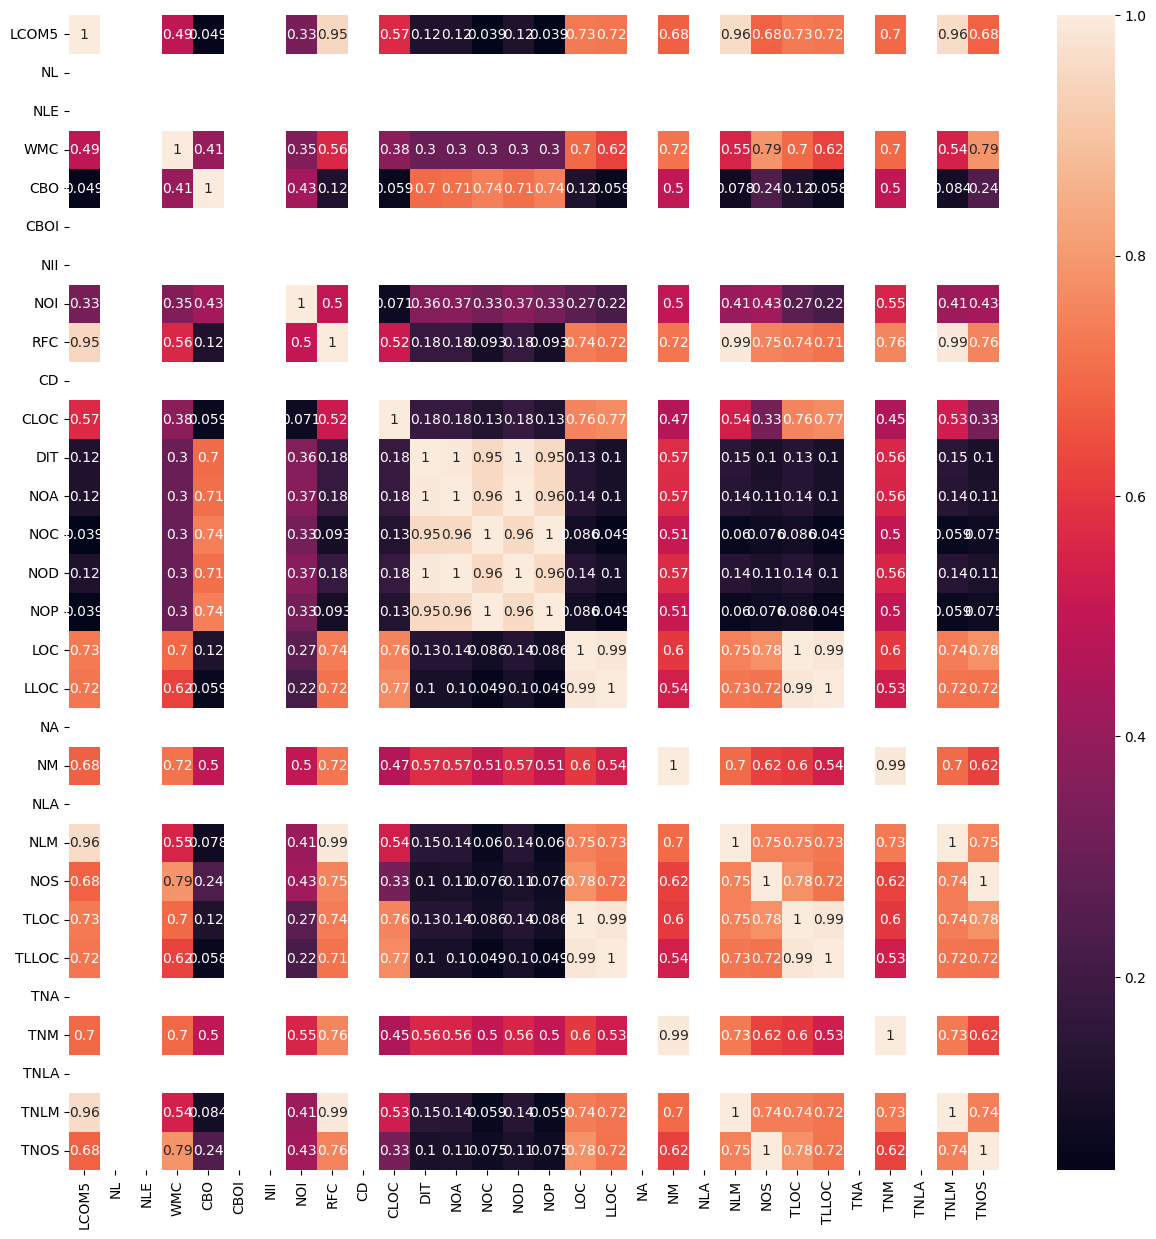

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
corr = df_class.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [70]:
corr.to_csv("class_metrics_corr.csv", index=False)

In [54]:
method_metrics = ["McCC", "NL", "NLE", "NII", "NOI", "CD", "CLOC", "DLOC",
                  "TCD", "TCLOC", "LLOC", "LOC", "NOS", "NUMPAR", "TLLOC",
                  "TLOC", "TNOS"]

In [56]:
df_method = {"repository": []}
for metric in method_metrics:
    df_method[metric] = []
for path in Path("/content").glob("SMResultsPart*/Results/*/*/python"):
    csv_paths = list(path.glob("*/*-Method.csv"))
    if len(csv_paths) == 0 or path.parts[-2] in df_method["repository"]:
        continue
    values = pd.read_csv(csv_paths[0])[method_metrics].mean()
    df_method["repository"].append(path.parts[-2])
    for metric, value in zip(method_metrics, values):
        df_method[metric].append(value)

In [59]:
df_method = pd.DataFrame(df_method)
df_method.to_csv("method_metricsSM.csv", index=False)

In [60]:
df_method.head()

,repository,McCC,NL,NLE,NII,NOI,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS
0,babysor_MockingBird,2.632207,0.0,0.0,0.0,0.395626,0.0,2.886680,1.544732,0.0,2.886680,13.570577,17.709742,9.590457,3.347913,13.570577,17.709742,9.590457
1,certbot_certbot,1.597723,0.0,0.0,0.0,0.439756,0.0,2.074125,1.354803,0.0,2.089395,8.004442,10.665464,5.111327,1.732649,8.061355,10.733481,5.149639
2,ansible_ansible,3.194241,0.0,0.0,0.0,0.455017,0.0,2.082991,0.834913,0.0,2.103023,11.456269,15.155250,7.994277,1.981399,11.608120,15.333930,8.096763
3,django_django,1.606205,0.0,0.0,0.0,0.256502,0.0,1.466205,0.792408,0.0,1.493169,10.150874,12.029593,4.931613,1.493249,10.598598,12.508782,5.021627
4,psf_black,2.751923,0.0,0.0,0.0,0.465385,0.0,2.673077,1.563462,0.0,2.767308,12.450000,15.265385,7.044231,1.580769,12.680769,15.596154,7.176923


In [61]:
df_method.describe()

,McCC,NL,NLE,NII,NOI,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS
count,114.000000,114.0,114.0,114.0,114.000000,114.0,114.000000,114.000000,114.0,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2.534804,0.0,0.0,0.0,0.337845,0.0,2.841295,1.909937,0.0,2.867078,11.813503,15.627896,6.853280,2.417792,12.097432,15.952246,7.019409
std,1.384794,0.0,0.0,0.0,0.130046,0.0,2.419226,2.265637,0.0,2.416870,3.935181,5.300500,2.352957,0.885122,4.001360,5.330752,2.393097
min,1.244683,0.0,0.0,0.0,0.019724,0.0,0.142857,0.000000,0.0,0.142857,5.313492,6.179646,2.452051,1.231481,5.531858,6.212389,2.497197
25%,1.879796,0.0,0.0,0.0,0.242054,0.0,1.383634,0.574517,0.0,1.410344,9.354173,12.376601,5.302086,1.953408,9.516953,12.546944,5.397327
50%,2.350660,0.0,0.0,0.0,0.344338,0.0,2.108320,1.267391,0.0,2.143626,11.013146,15.114575,6.518356,2.212913,11.261312,15.595083,6.850918
75%,2.825708,0.0,0.0,0.0,0.418712,0.0,3.461389,2.257477,0.0,3.483378,13.357058,17.708658,8.062149,2.708230,13.687277,17.897755,8.220019
max,15.025095,0.0,0.0,0.0,0.824222,0.0,16.017704,15.839776,0.0,16.027442,28.957283,34.112734,16.962118,7.795918,28.586207,34.244181,17.050205


In [62]:
df_method.describe().to_csv("method_metricsSM_describe.csv", index=False)

<Axes: >

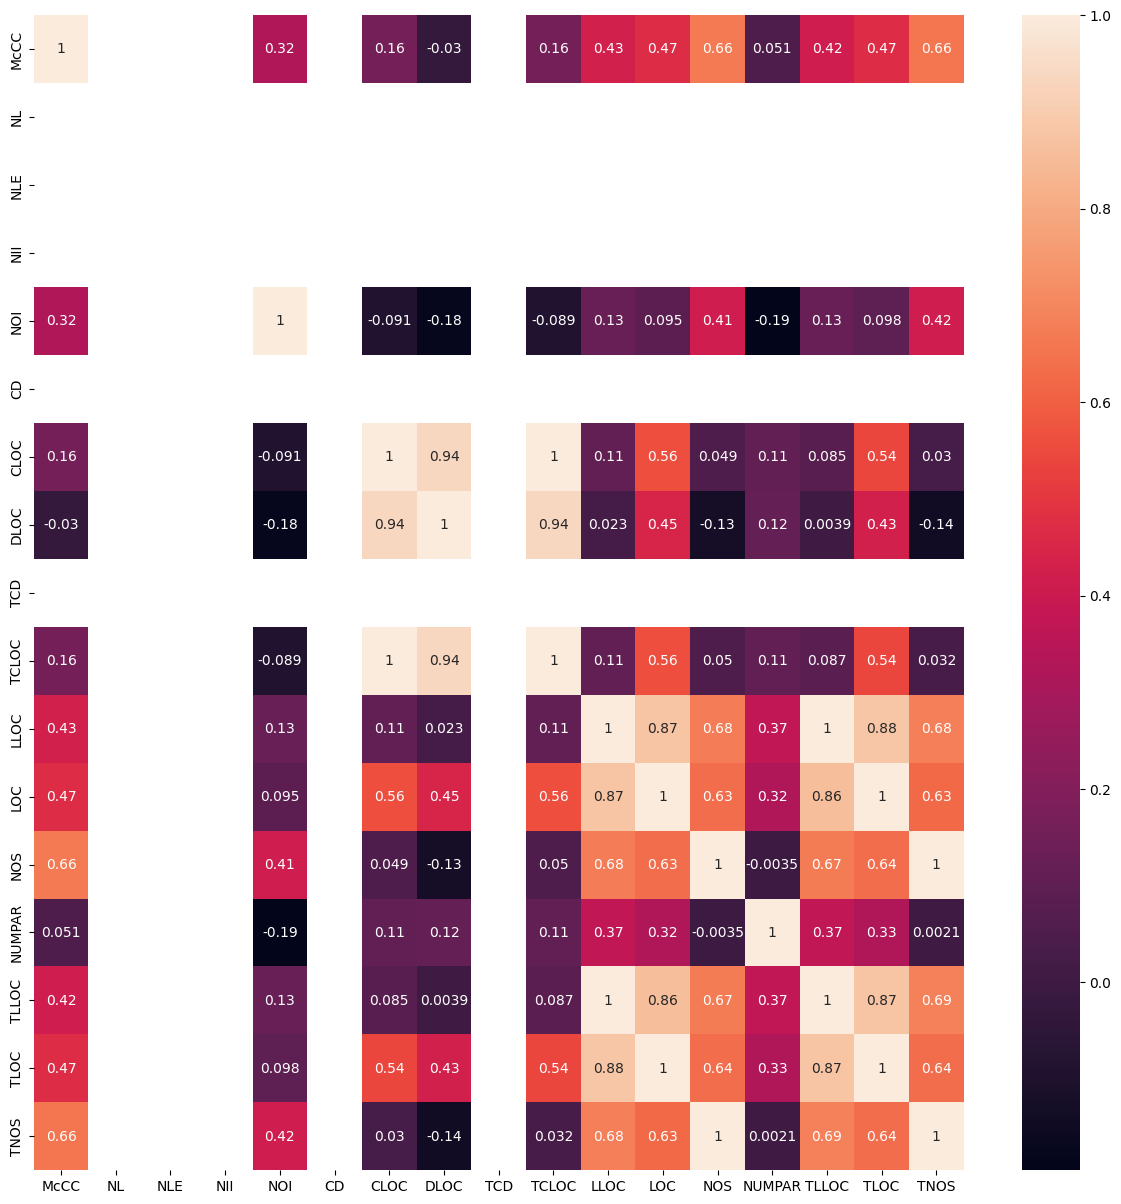

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
corr = df_method.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [72]:
corr.to_csv("method_metricsSM_corr.csv", index=False)